In [61]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8) # Adjusts the configuration of the plots we will create


In [62]:
# Read in the data
df=pd.read_csv('E:\AlexTheAnalyst\PythonCorrelation\movies.csv')

In [63]:
# Let's look at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [64]:
# Let's see if there is any missing data
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print ('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [65]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [66]:
df=df.dropna()

In [67]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [89]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  yearcorrect  
0   699       46  19000000   46998772     1426    146.0            0  
1   214       47   4500000   58853106      452    104.0            0  
2  1157       47  18000000  538375067      945    124.0            0  
3  1474       47   3500000   83453539     1108     88.0            0  
4   271       47   6000000   39846344     1083     98.0            0

In [69]:
df['yearcorrect']=df['released'].str.split("(").str[0].str.strip()

In [70]:
#df['yearcorrect']=df['yearcorrect'].str.slice(start=-4)
df['yearcorrect']=df['yearcorrect'].astype(str).str[-4:]
df

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
33                     Cattle Annie and Little Britches         PG      Drama   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
42                                        The Stunt Man          R     Action   
46                                           The Island          R     Action   
48                                        The Nude Bomb         PG     Action   
50                                    Stardust Memories         PG     Comedy   
51                                    Melvin and Howard          R     Comedy   
53                                         Bronco Billy         PG     Action   
56                                 When Time Ran Out...         PG     Action   
57                                      Oh Heavenly Dog         PG     Comedy   
58                                          The Octagon          R     Action   
75                        The Last Flight of Noah's Ark          G  Adventure   
77                                        Willie & Phil          R     Comedy   
80                                               Phobia          R      Drama   
92        Indiana Jones and the Raiders of the Lost Ark         PG     Action   
94                       An American Werewolf in London          R     Comedy   
95                                 Escape from New York          R     Action   
96                                        The Evil Dead      NC-17     Horror   
97                                              Porky's          R     Comedy   
98                                             Blow Out          R      Crime   
99                                  Clash of the Titans         PG     Action   
100                                           Excalibur          R  Adventure   
101                                           Mad Max 2          R     Action   
1

In [71]:
df.yearcorrect

0       1980
1       1980
2       1980
3       1980
4       1980
5       1980
6       1980
7       1980
8       1981
9       1980
10      1980
11      1984
12      1980
13      1980
14      1980
15      1980
17      1980
18      1980
20      1980
21      1981
22      1980
23      1980
28      1980
29      1980
33      1981
35      1980
36      1980
37      1980
42      1980
46      1980
48      1980
50      1980
51      1980
53      1980
56      1980
57      1980
58      1980
75      1980
77      1980
80      1980
92      1981
94      1981
95      1981
96      1983
97      1982
98      1981
99      1981
100     1981
101     1982
103     1981
105     1981
106     1981
108     1981
110     1981
112     1981
113     1981
114     1981
115     1981
117     1981
118     1982
119     1981
120     1981
121     1981
122     1981
126     1981
127     1981
128     1981
129     1982
130     1982
131     1981
132     1981
133     1981
134     1981
136     1981
137     1981
139     1981
141     1981

In [88]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  1534       47  237000000  2847246203     1382    162.0           29  
7445  1470       47  356000000  2797501328      983    181.0           39  
3045  1073       47  200000000  2201647264     1382    194.0           17  
6663   356       47  245000000  2069521700      945    138.0           35  
7244  1470       47  321000000  2048359754      983    149.0           38

In [51]:
# Drop any duplicates
df=df.drop_duplicates().sort_values(ascending=False)

In [52]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

In [53]:
# Budget high correlation
# company high correlation

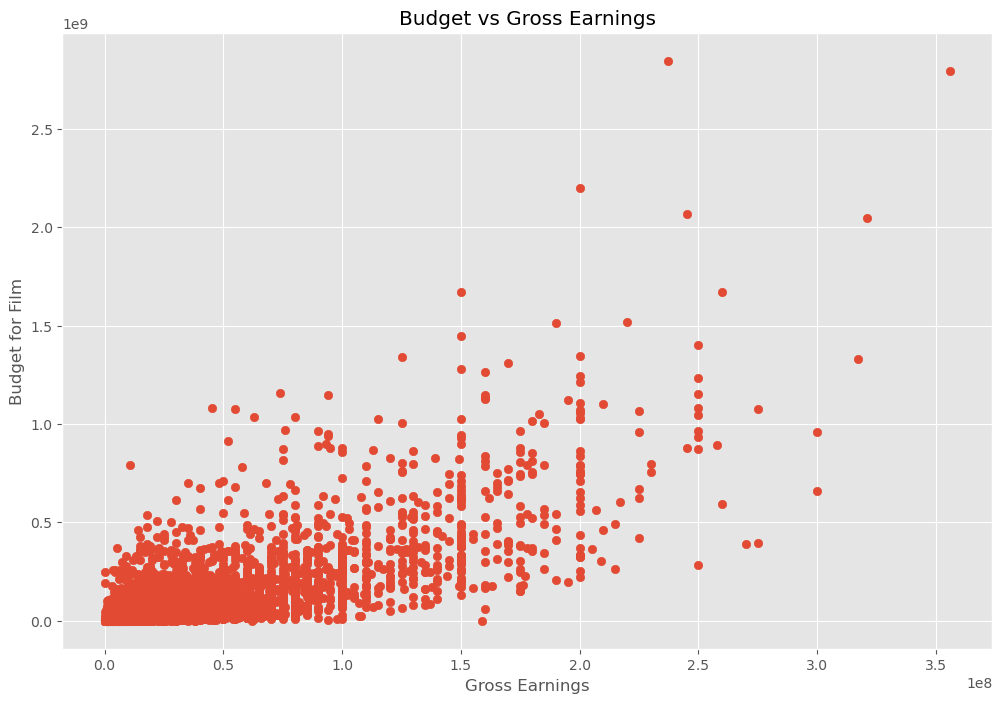

In [54]:
# Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [73]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        1980  
1   58853106   Columbia Pictures    104.0        1980  
2  538375067           Lucasfilm    124.0        1980  
3   83453539  Paramount Pictures     88.0        1980  
4   39846344      Orion Pictures     98.0        1980

<Axes: xlabel='budget', ylabel='gross'>

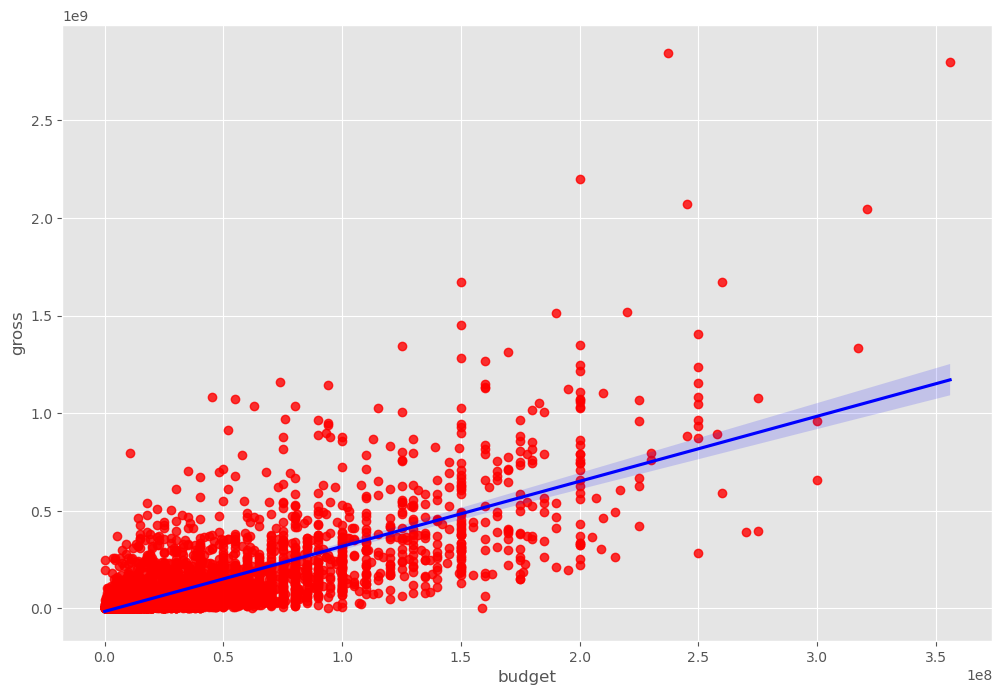

In [74]:
# Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [ ]:
# Let's start lookig at correlation

In [75]:
df[['budget','gross','runtime','score','votes','year']].corr(method='kendall') #pearson, kendal, spearman

budget     gross   runtime     score     votes      year
budget   1.000000  0.512057  0.231278 -0.006406  0.346274  0.220833
gross    0.512057  1.000000  0.176979  0.124943  0.553625  0.239539
runtime  0.231278  0.176979  1.000000  0.292254  0.205344  0.064824
score   -0.006406  0.124943  0.292254  1.000000  0.350185  0.039389
votes    0.346274  0.553625  0.205344  0.350185  1.000000  0.296512
year     0.220833  0.239539  0.064824  0.039389  0.296512  1.000000

In [ ]:
# High correlation between budget and gross
# I was right

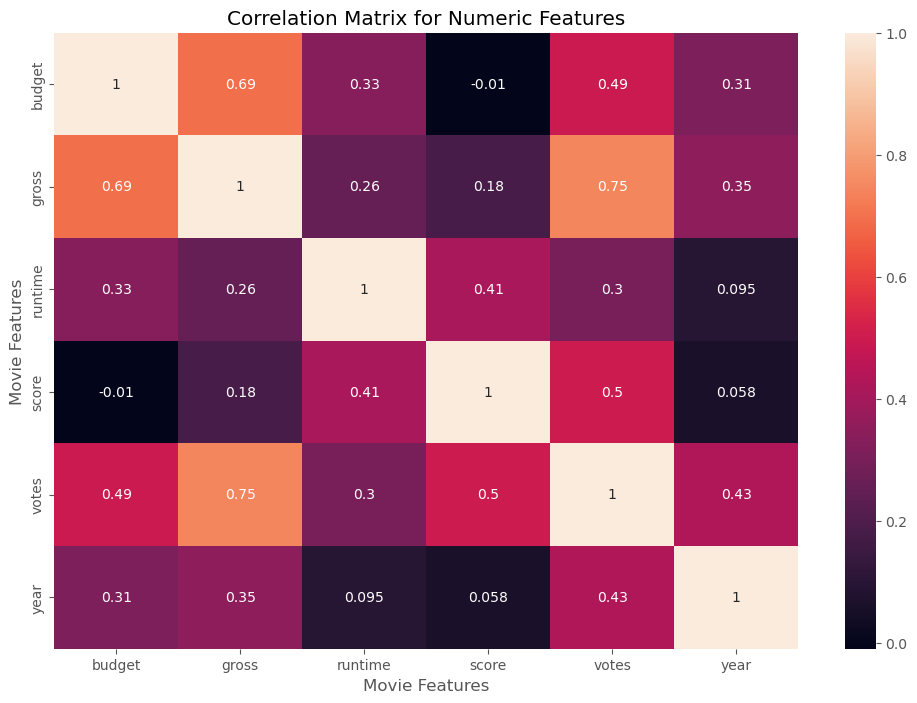

In [76]:
correlation_matrix=df[['budget','gross','runtime','score','votes','year']].corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
# Looks at company

In [87]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  yearcorrect  
0   699       46  19000000   46998772     1426    146.0            0  
1   214       47   4500000   58853106      452    104.0            0  
2  1157       47  18000000  538375067      945    124.0            0  
3  1474       47   3500000   83453539     1108     88.0            0  
4   271       47   6000000   39846344     1083     98.0            0

In [78]:
df_numerized=df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized.head()
    

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  yearcorrect  
0   699       46  19000000   46998772     1426    146.0            0  
1   214       47   4500000   58853106      452    104.0            0  
2  1157       47  18000000  538375067      945    124.0            0  
3  1474       47   3500000   83453539     1108     88.0            0  
4   271       47   6000000   39846344     1083     98.0            0

In [79]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1  3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3   204       4      4  1980      1127    7.7   221000.0       889    1413   
4   732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  yearcorrect  
0   699       46  19000000   46998772     1426    146.0            0  
1   214       47   4500000   58853106      452    104.0            0  
2  1157       47  18000000  538375067      945    124.0            0  
3  1474       47   3500000   83453539     1108     88.0            0  
4   271       47   6000000   39846344     1083     98.0            0

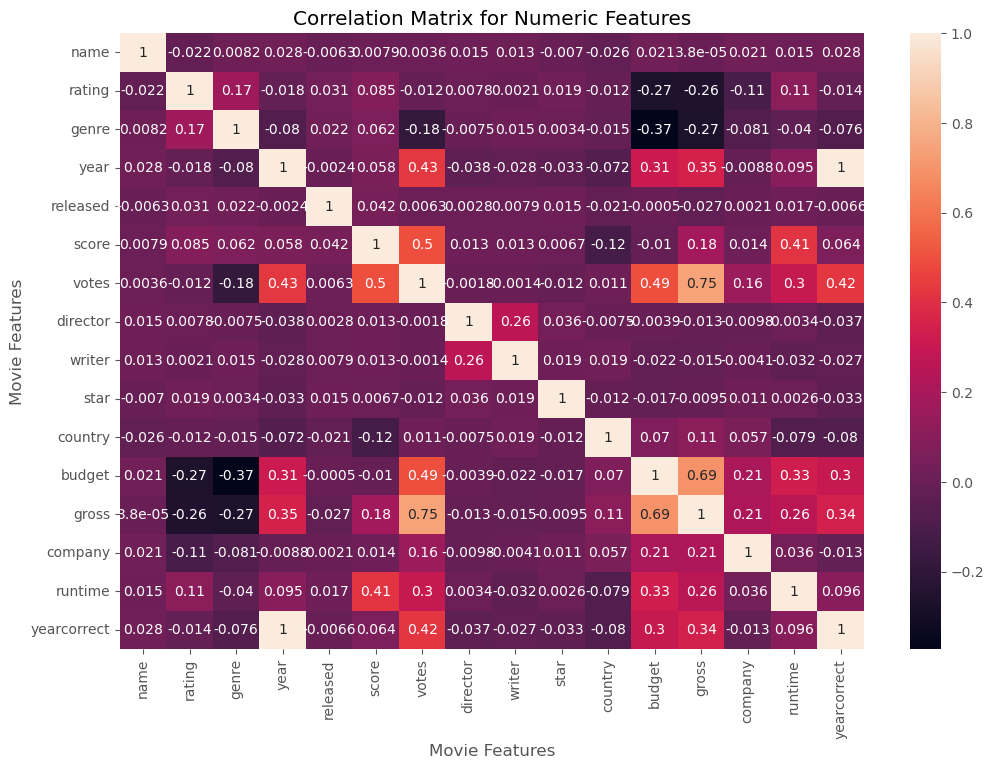

In [80]:
correlation_matrix=df_numerized.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [84]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [85]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [86]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings